In [1]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as ply
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
import random
from matplotlib.gridspec import GridSpec
from operator import itemgetter
from mpl_toolkits.axes_grid1 import make_axes_locatable

#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [95]:
#cec3020 = np.load('cec_rg_mapa3020.npy')
#cec3025 = np.load('cec_rg_mapa3025.npy')
cec3034 = np.load('cec_rg_mapa3034.npy')
cec3075 = np.load('cec_rg_mapa3075.npy')
cec3100 = np.load('cec_rg_mapa3100.npy')

img = imread("mapa_background.png")

NUM = [1,2,3,4,7,10,12,23,25,31,32,34,37,38,39,40,42,43,44,45,47,48,49,50,52,53,-19,-42]

A = [];B = []
for i in NUM:
    if i > 0 and i < 10:
        a = "NA0"+str(i)+"_teste.txt"
        b = "NA0"+str(i)
    elif i < 0:
        a = "RJS00" + str(i*(-1)) +"_teste.txt"
        b = "RJS00" + str(i*(-1))
    else:
        a = "NA" +str(i)+"_teste.txt"
        b = "NA" +str(i)
    A.append(a)
    B.append(b)
    
print(A)

val = []
for i in range(len(A)):
    val.append('dados_GR/'+str(A[i]))

DATA = np.array([[[0]*5]*986]*len(val),float) # [p,c,l] [k,j,i] = profundidade, coluna, linha

print (shape(DATA))

for k in range(len(val)): #<- Alterar para len(poc2) para incluir todos os pocos use 2 ou 3 pra testar
    data1  = np.fromfile(val[k], dtype=float, count=-1, sep='	')
    p2  = len(data1)/5
    data1  = np.array(np.reshape(data1, (len(data1)/5,5)))
    
    for j in range (5):
        for i in range(986):
            DATA[k,i,j] = data1[i,j]
            
print (shape(DATA))

#---------------------------------#
eixox = 'UTM x (km)'
eixoy = 'UTM y (km)'
limit = np.array([0,1.7,3.4,5,5.7,8.4,10,20,30,40,70,100,150])#np.array([0,5,10,40,150])
legen = ['','','','','','','','','',]
titul = ''
comap = 'jet'
fontsz= '9'
#-------------------------------------------------------------------------------------#
X0 = [];X = [];x = []
Y0 = [];Y = [];y = []


for i in range (len(DATA[:,0,0])):
    X0.append(int(DATA[i,0,0]))
    X.append(int((DATA[i,0,0] - 351000)/10))
    x.append(int((DATA[i,0,0] - 351000)/10))
    Y0.append(int(DATA[i,0,1]))
    Y.append(int((7519000 - DATA[i,0,1])/10))
    y.append(int((7519000 - DATA[i,0,1])/10))
    
x[11] = 143 # NA34D
x[2]  = 386 # NA03
x[23] = 455; y[23] = 230 # NA50
    
print(X0)
print('___________________________')
print(Y0)
print('___________________________')
print(B)
print(B[13],x[13],y[13])

['NA01_teste.txt', 'NA02_teste.txt', 'NA03_teste.txt', 'NA04_teste.txt', 'NA07_teste.txt', 'NA10_teste.txt', 'NA12_teste.txt', 'NA23_teste.txt', 'NA25_teste.txt', 'NA31_teste.txt', 'NA32_teste.txt', 'NA34_teste.txt', 'NA37_teste.txt', 'NA38_teste.txt', 'NA39_teste.txt', 'NA40_teste.txt', 'NA42_teste.txt', 'NA43_teste.txt', 'NA44_teste.txt', 'NA45_teste.txt', 'NA47_teste.txt', 'NA48_teste.txt', 'NA49_teste.txt', 'NA50_teste.txt', 'NA52_teste.txt', 'NA53_teste.txt', 'RJS0019_teste.txt', 'RJS0042_teste.txt']
(28, 986, 5)


/home/mario/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


(28, 986, 5)
[354570, 352960, 355230, 355420, 353270, 353830, 354600, 353500, 353960, 355240, 354270, 352810, 355390, 353520, 354250, 353100, 353300, 353940, 353740, 354370, 355110, 354490, 355480, 355860, 354900, 354960, 353890, 352040]
___________________________
[7517400, 7517300, 7518100, 7515500, 7518100, 7517300, 7516700, 7518600, 7518100, 7516900, 7518500, 7517300, 7516400, 7517600, 7517800, 7517700, 7516300, 7516000, 7516900, 7515700, 7517500, 7516200, 7515900, 7516800, 7515800, 7516400, 7516500, 7518200]
___________________________
['NA01', 'NA02', 'NA03', 'NA04', 'NA07', 'NA10', 'NA12', 'NA23', 'NA25', 'NA31', 'NA32', 'NA34', 'NA37', 'NA38', 'NA39', 'NA40', 'NA42', 'NA43', 'NA44', 'NA45', 'NA47', 'NA48', 'NA49', 'NA50', 'NA52', 'NA53', 'RJS0019', 'RJS0042']
NA38 252 140


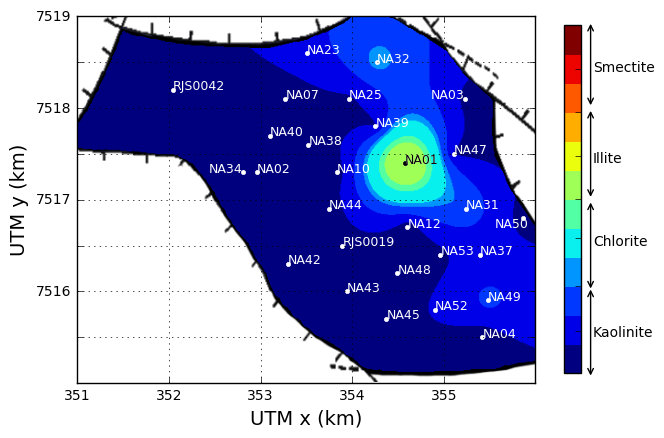

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20, 12)
profun = '3034'
value  = eval('cec'+profun)


norm = colors.BoundaryNorm(boundaries=limit, ncolors=256)

plt.tight_layout(pad=0.5, w_pad=2.5, h_pad=2.0)
ax1 = plt.subplot(131)
ax1.imshow(img)
i1 = ax1.imshow(value,cmap=comap,vmin=0.0,vmax=150, norm=norm)
cb1 = fig.colorbar(i1, shrink=0.30, ticks=[0,2.5,5,7.5,10,25,40,85,150])
cb1.ax.set_yticklabels(legen)
plt.contourf(value, 15, alpha=0.0, cmap=comap,vmin=0,vmax=150, norm=norm)

plt.title(titul,fontsize=24)
#-------------------------#
for i in range(len(B)):
    plt.text(x[i],y[i],B[i], color='w',fontsize=fontsz)
    plt.plot(X[i],Y[i],'.w')
    
plt.text(x[0],y[0],B[0], color='k',fontsize=fontsz)
plt.plot(X[0],Y[0],'.k')
#-------------------------#
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 295), xycoords='data',xytext=(560, 395),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Kaolinite', xy=(555, 345), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 200), xycoords='data',xytext=(560, 300),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Chlorite', xy=(555, 245), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 100), xycoords='data',xytext=(560, 200),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Illite', xy=(555, 155), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 5), xycoords='data',xytext=(560, 100),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Smectite', xy=(555, 55), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)

ax1.set_xticklabels([351,351,352,353,354,355,356])
ax1.set_yticklabels([7519,7519," ",7518," ",7517," ",7516," ",7515])
ax1.set_ylabel(eixoy,fontsize=14)
ax1.set_xlabel(eixox,fontsize=14)
ax1.grid()

plt.show()
fig.savefig('mapas/CEC_GR'+profun+'.pdf', dpi=200, transparent=True, bbox_inches='tight')

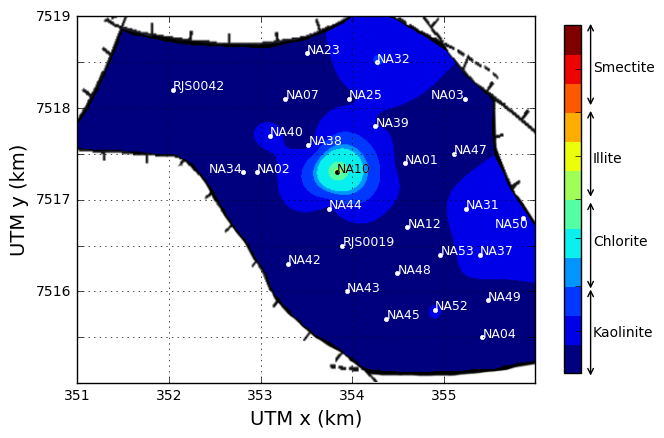

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20, 12)
profun = '3075'
value  = eval('cec'+profun)


norm = colors.BoundaryNorm(boundaries=limit, ncolors=256)

plt.tight_layout(pad=0.5, w_pad=2.5, h_pad=2.0)
ax1 = plt.subplot(131)
ax1.imshow(img)
i1 = ax1.imshow(value,cmap=comap,vmin=0.0,vmax=150, norm=norm)
cb1 = fig.colorbar(i1, shrink=0.30, ticks=[0,2.5,5,7.5,10,25,40,85,150])
cb1.ax.set_yticklabels(legen)
plt.contourf(value, 15, alpha=0.0, cmap=comap,vmin=0,vmax=150, norm=norm)

plt.title(titul,fontsize=24)
#-------------------------#
for i in range(len(B)):
    plt.text(x[i],y[i],B[i], color='w',fontsize=fontsz)
    plt.plot(X[i],Y[i],'.w')
    
plt.text(x[5],y[5],B[5], color='k',fontsize=fontsz)
plt.plot(X[5],Y[5],'.k')
#-------------------------#
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 295), xycoords='data',xytext=(560, 395),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Kaolinite', xy=(555, 345), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 200), xycoords='data',xytext=(560, 300),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Chlorite', xy=(555, 245), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 100), xycoords='data',xytext=(560, 200),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Illite', xy=(555, 155), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 5), xycoords='data',xytext=(560, 100),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Smectite', xy=(555, 55), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)

ax1.set_xticklabels([351,351,352,353,354,355,356])
ax1.set_yticklabels([7519,7519," ",7518," ",7517," ",7516," ",7515])
ax1.set_ylabel(eixoy,fontsize=14)
ax1.set_xlabel(eixox,fontsize=14)
ax1.grid()

plt.show()
fig.savefig('mapas/CEC_GR'+profun+'.pdf', dpi=200, transparent=True, bbox_inches='tight')

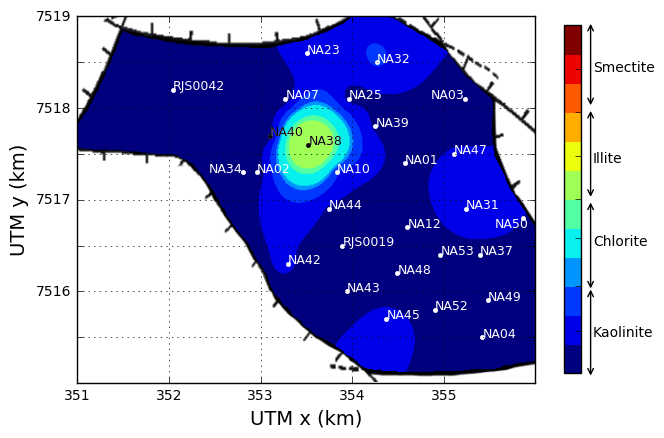

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20, 12)
profun = '3100'
value  = eval('cec'+profun)

norm = colors.BoundaryNorm(boundaries=limit, ncolors=256)

plt.tight_layout(pad=0.5, w_pad=2.5, h_pad=2.0)
ax1 = plt.subplot(131)
ax1.imshow(img)
i1 = ax1.imshow(value,cmap=comap,vmin=0.0,vmax=150, norm=norm)
cb1 = fig.colorbar(i1, shrink=0.30, ticks=[0,2.5,5,7.5,10,25,40,85,150])
cb1.ax.set_yticklabels(legen)
plt.contourf(value, 15, alpha=0.0, cmap=comap,vmin=0,vmax=150, norm=norm)

plt.title(titul,fontsize=24)
#-------------------------#
for i in range(len(B)):
    plt.text(x[i],y[i],B[i], color='w',fontsize=fontsz)
    plt.plot(X[i],Y[i],'.w')
    
plt.text(x[13],y[13],B[13], color='k',fontsize=fontsz)
plt.plot(X[13],Y[13],'.k')
plt.text(x[15],y[15],B[15], color='k',fontsize=fontsz)
plt.plot(X[15],Y[15],'.k')
#-------------------------#
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 295), xycoords='data',xytext=(560, 395),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Kaolinite', xy=(555, 345), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 200), xycoords='data',xytext=(560, 300),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Chlorite', xy=(555, 245), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 100), xycoords='data',xytext=(560, 200),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Illite', xy=(555, 155), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate('', xy=(560, 5), xycoords='data',xytext=(560, 100),textcoords='data',
arrowprops={'arrowstyle':'<->'}, annotation_clip=False)
plt.annotate('Smectite', xy=(555, 55), xycoords='data',xytext=(5, -3),
textcoords='offset points', annotation_clip=False)

ax1.set_xticklabels([351,351,352,353,354,355,356])
ax1.set_yticklabels([7519,7519," ",7518," ",7517," ",7516," ",7515])
ax1.set_ylabel(eixoy,fontsize=14)
ax1.set_xlabel(eixox,fontsize=14)
ax1.grid()

plt.show()
fig.savefig('mapas/CEC_GR'+profun+'.pdf', dpi=200, transparent=True, bbox_inches='tight')